In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
amazon_df = pd.read_csv('/Users/anshumantewary/Downloads/Projects/NLP - Twitter Sentiment Analysis/amazon_reviews.csv')
amazon_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [3]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
amazon_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [5]:
amazon_df = amazon_df.drop(['date'], axis = 1)

In [6]:
amazon_df #Looks better now

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1
...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,Black Dot,"Listening to music, searching locations, check...",1
3147,5,Black Dot,"I do love these things, i have them running my...",1
3148,5,White Dot,Only complaint I have is that the sound qualit...,1


<AxesSubplot:>

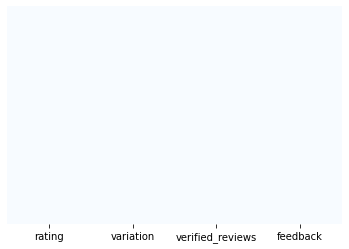

In [7]:
#Lets do some EDA
sns.heatmap(amazon_df.isnull(), yticklabels=False, cbar = False, cmap="Blues") #No null values

<AxesSubplot:>

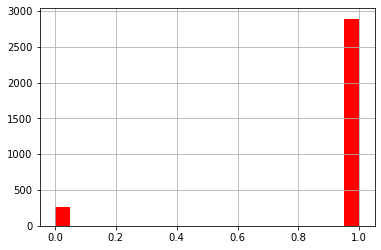

In [8]:
amazon_df['feedback'].hist(bins = 20, color = 'Red') #Biased data, much more positive reviews

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feedback', ylabel='count'>

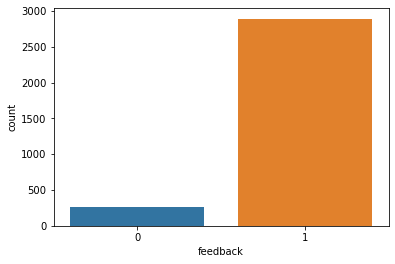

In [9]:
sns.countplot(amazon_df['feedback'])

In [10]:
amazon_df['length']=amazon_df['verified_reviews'].apply(len)
amazon_df

,rating,variation,verified_reviews,feedback,length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


<AxesSubplot:>

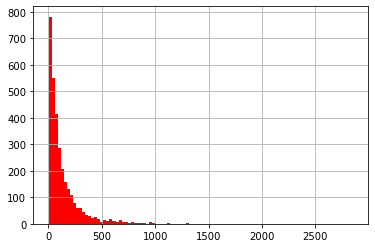

In [11]:
#Lets look at the distribution of this length column

amazon_df['length'].hist(bins = 100, color = "Red") #So the mean lies b/w 0-100 words

In [12]:
amazon_df['length'].describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [13]:
#As expected, almost 75% reviews are less than or equal to 165 words, same like we plotted

#Lets find the longest review in this sentence

amazon_df[amazon_df['length']==2851]['verified_reviews'] 

2016    Incredible piece of technology.I have this rig...
Name: verified_reviews, dtype: object

## WordCloud

In [14]:
#Lets combine the reviews in one sentence

sentence = amazon_df['verified_reviews'].tolist()
len(sentence)

3150

In [15]:
#sentence

#The sentence is separated by " ". Let's join the sentence

In [16]:
sentence_as_one = " ".join(sentence)

In [17]:
from wordcloud import WordCloud

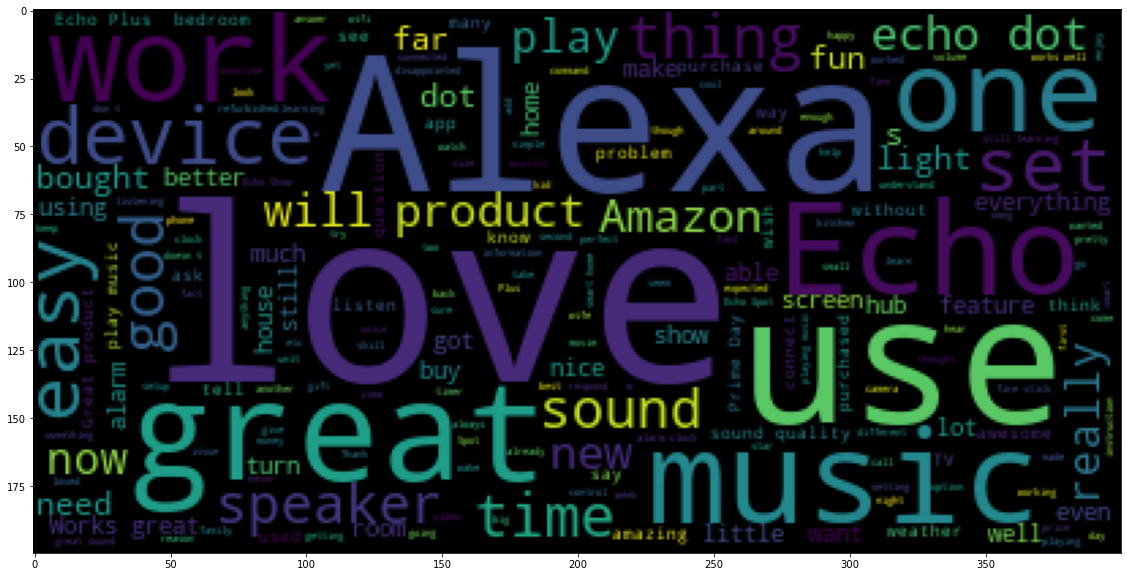

In [18]:
plt.figure(figsize = (20,10))
plt.imshow(WordCloud().generate(sentence_as_one))

In [31]:
negative = amazon_df[amazon_df['feedback']==0]['verified_reviews'].tolist()

In [32]:
len(negative)

257

In [34]:
negative_as_one = " ".join(negative)

In [35]:
len(negative_as_one)

55573

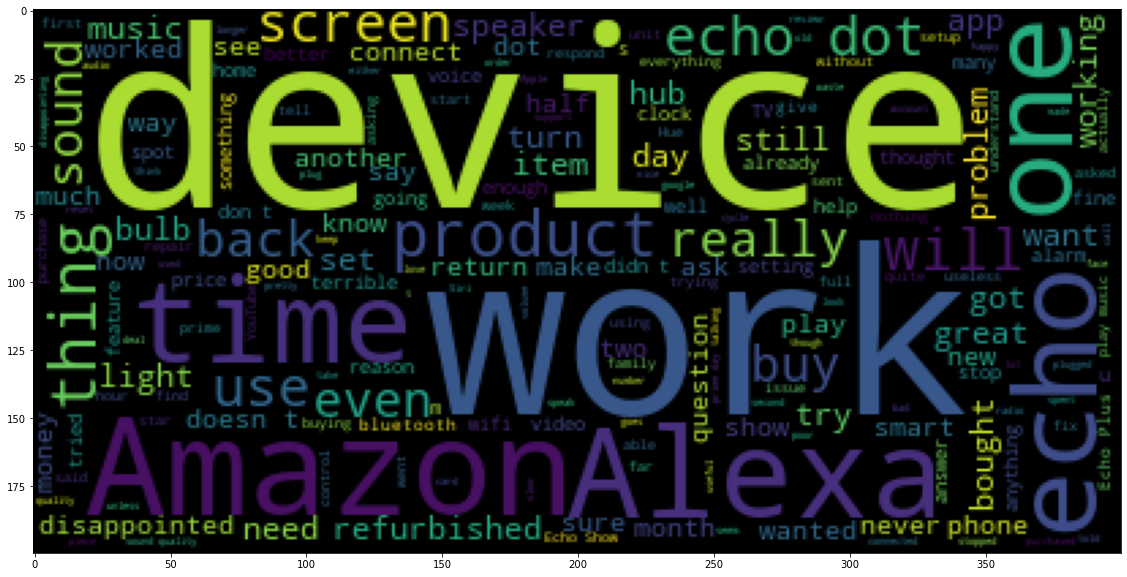

In [39]:
plt.figure(figsize = (20,10))
plt.imshow(WordCloud().generate(negative_as_one))
plt.show()

## Removing punctuation and stopwords 

In [45]:
import string
string.punctuation

import nltk
from nltk.corpus import stopwords

In [119]:
Test1 = '$I love AI & Machine learning !!'

x1 = [ i for i in Test1 if i not in string.punctuation  ]
punc_rem = ''.join(x1)
punc_rem

'I love AI  Machine learning '

In [55]:
#stopwords.words('english')

In [61]:
Test2 = 'Hey you, what are you doing?'

x2 = [ i for i in Test2.split() if i.lower() not in stopwords.words('english')   ]

In [62]:
# all tests are working, lets now create a pipeline to apply the same

In [64]:
#Let's create a function to apply all these

def cleaning (message):
    punc_remove = [ i for i in message if i not in string.punctuation ]
    punc_remove_join = ''.join(punc_remove)
    words_remove = [ i for i in punc_remove_join.split() if i.lower() not in stopwords.words('english')  ]
    return words_remove
    

In [65]:
amazon_cleaned = amazon_df['verified_reviews'].apply(cleaning)

## Count Vectorizer

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(analyzer=cleaning)
reviews_df = vector.fit_transform(amazon_df['verified_reviews'])

reviews_df.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [88]:
reviews_df.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [80]:
#Creating a dataframe to train the model based on the data 

In [84]:
X = pd.DataFrame(reviews_df.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
y = amazon_df['feedback']

## Model creation using Naive Bayes Classifier

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [93]:
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

In [94]:
# Confusion matrix

In [98]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = NB_classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

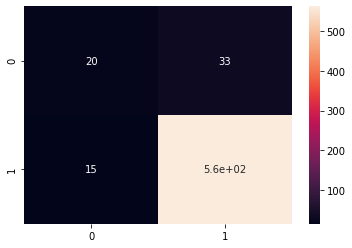

In [101]:
sns.heatmap(cm, annot = True)

In [102]:
#Get the classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.38      0.45        53
           1       0.94      0.97      0.96       577

    accuracy                           0.92       630
   macro avg       0.76      0.68      0.71       630
weighted avg       0.91      0.92      0.92       630



## Using Logistic Regression

In [103]:
#Lets use another classifier, logistic regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

<AxesSubplot:>

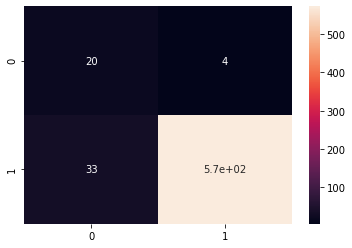

In [108]:
y_pred1 = model.predict(x_test)

cm1 = confusion_matrix(y_pred1, y_test)

sns.heatmap(cm1, annot = True) #Better classifier

## Using Gradient Boosting

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

In [110]:
model2 = GradientBoostingClassifier()

In [111]:
model2.fit(x_train, y_train)

GradientBoostingClassifier()

In [113]:
y_pred3 = model2.predict(x_test)

In [114]:
cm3 = confusion_matrix(y_pred3, y_test)

<AxesSubplot:>

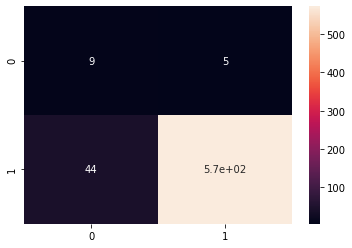

In [115]:
sns.heatmap(cm3, annot = True)

In [116]:
print(classification_report(y_pred3, y_test))

              precision    recall  f1-score   support

           0       0.17      0.64      0.27        14
           1       0.99      0.93      0.96       616

    accuracy                           0.92       630
   macro avg       0.58      0.79      0.61       630
weighted avg       0.97      0.92      0.94       630



In [ ]:
#As per the data received in the classifier, both the logistic regression and xg boosting work better than Naive bayes

